#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [1]:
# Jika di Google Collab
# !pip install joypy

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
# Jika di Google Collab
# from google.colab import files
# uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [3]:
# Jika di Google Collab
# import io
# data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
# study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

In [4]:
# Jika di Anaconda
data = pd.read_csv("penguins_size.csv", delimiter=",")
study_data = pd.read_csv("penguins_lter.csv", delimiter=",")

In [5]:
data.head() #Melihat isi data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [10]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


***
**Insight**
***
Berapa rata - rata body mass penguin?

In [14]:
print('Rata - rata body mass penguin = ', round(data.body_mass_g.mean(), 2))

Rata - rata body mass penguin =  4201.75


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [9]:
data.describe() #Melihat statistik deskriptif

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
#Melihat statistik deskriptif dari kolom categori
data.describe(include="object")

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


**Insight**

Berapa rata - rata body mass penguin? 4201.754386

##**Handling Missing Values**

Cek jumlah missing value!

In [11]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


Terdapat missing value pada feature culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, dan sex

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [13]:
#input your code here
data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm',
                    'flipper_length_mm', 'body_mass_g'], inplace=True)

#Parameter inplace=True memastikan bahwa perubahan dilakukan pada DataFrame asli.
# Setelah menjalankan kode ini, setiap baris yang memiliki nilai yang hilang di kolom
# yang ditentukan akan dihapus dari DataFrame.

Mengisi missing value pada sex dengan modus!

In [14]:
#input your code here
mode_value = data['sex'].mode()[0] # Untuk mendapatkan nilai pada kolom 'sex'
data['sex'].fillna(mode_value, inplace=True)# Isi nilai yang hilang dengan nilai mode

print(mode_value)

MALE


Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [15]:
#input your code here
data.drop(data[data['sex'] == '.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [16]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.3+ KB


In [17]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


***
**Insight**
***
Apakah masih terdapat missing value? Tidak

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


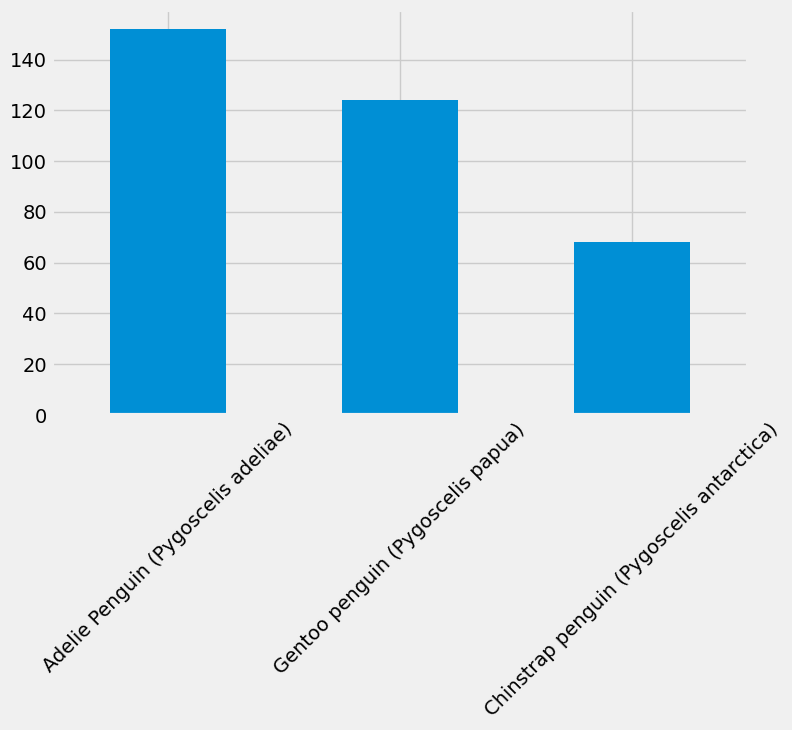

In [18]:
#input your code here 
species_counts = study_data['Species'].value_counts()
species_counts.plot(kind='bar')
plt.xticks(rotation = 45)

print(species_counts)

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Adelie Penguin (Pygoscelis adeliae) dengan jumlah 152

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

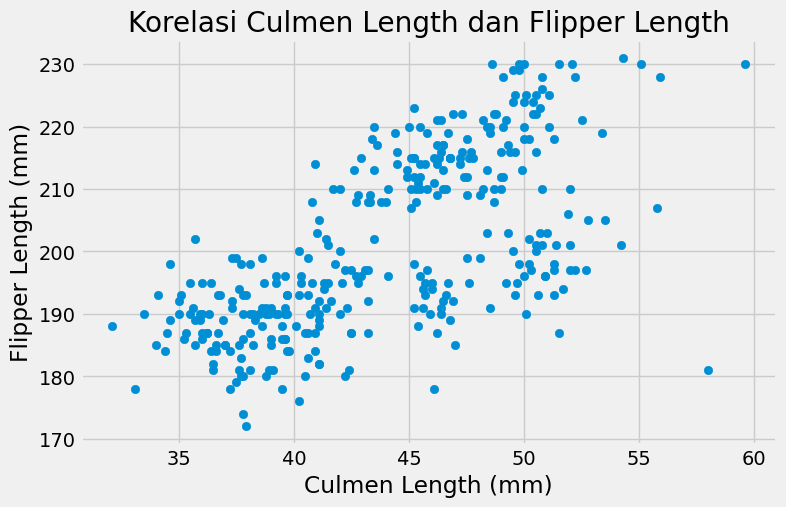

In [19]:
#input your code here
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Korelasi Culmen Length dan Flipper Length')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

In [20]:
#berikut penjelasan dari korelasinya
korelasi = np.corrcoef(data['culmen_length_mm'], data['flipper_length_mm'])
print('Korelasi  antara culmen_length dan flipper_length adalah:\n', korelasi)

Korelasi  antara culmen_length dan flipper_length adalah:
 [[1.         0.65710152]
 [0.65710152 1.        ]]


Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

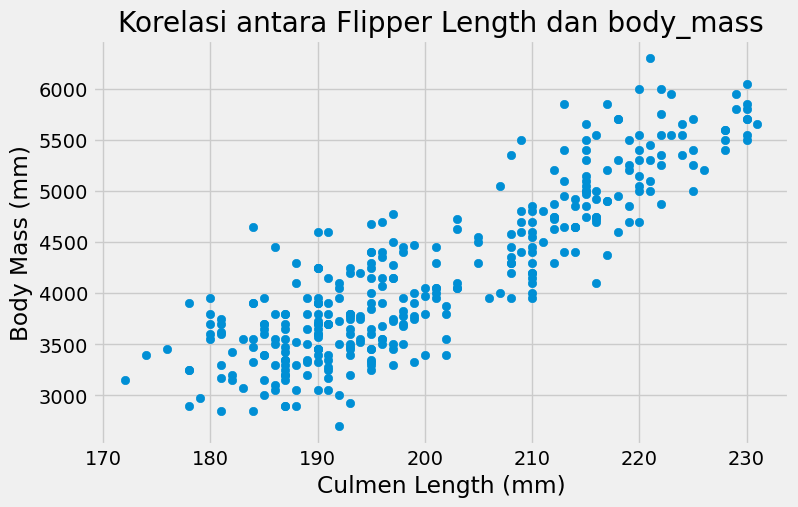

In [21]:
#input your code here
plt.scatter(data['flipper_length_mm'], data['body_mass_g'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Korelasi antara Flipper Length dan body_mass')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

In [22]:
#berikut penjelasan dari korelasinya
korelasi = np.corrcoef(data['flipper_length_mm'], data['body_mass_g'])
print('korelasi antara flipper_length dan body_mass adalah:\n',korelasi)

korelasi antara flipper_length dan body_mass adalah:
 [[1.        0.8709563]
 [0.8709563 1.       ]]


Tampilkan pairplot dari semua variabel!

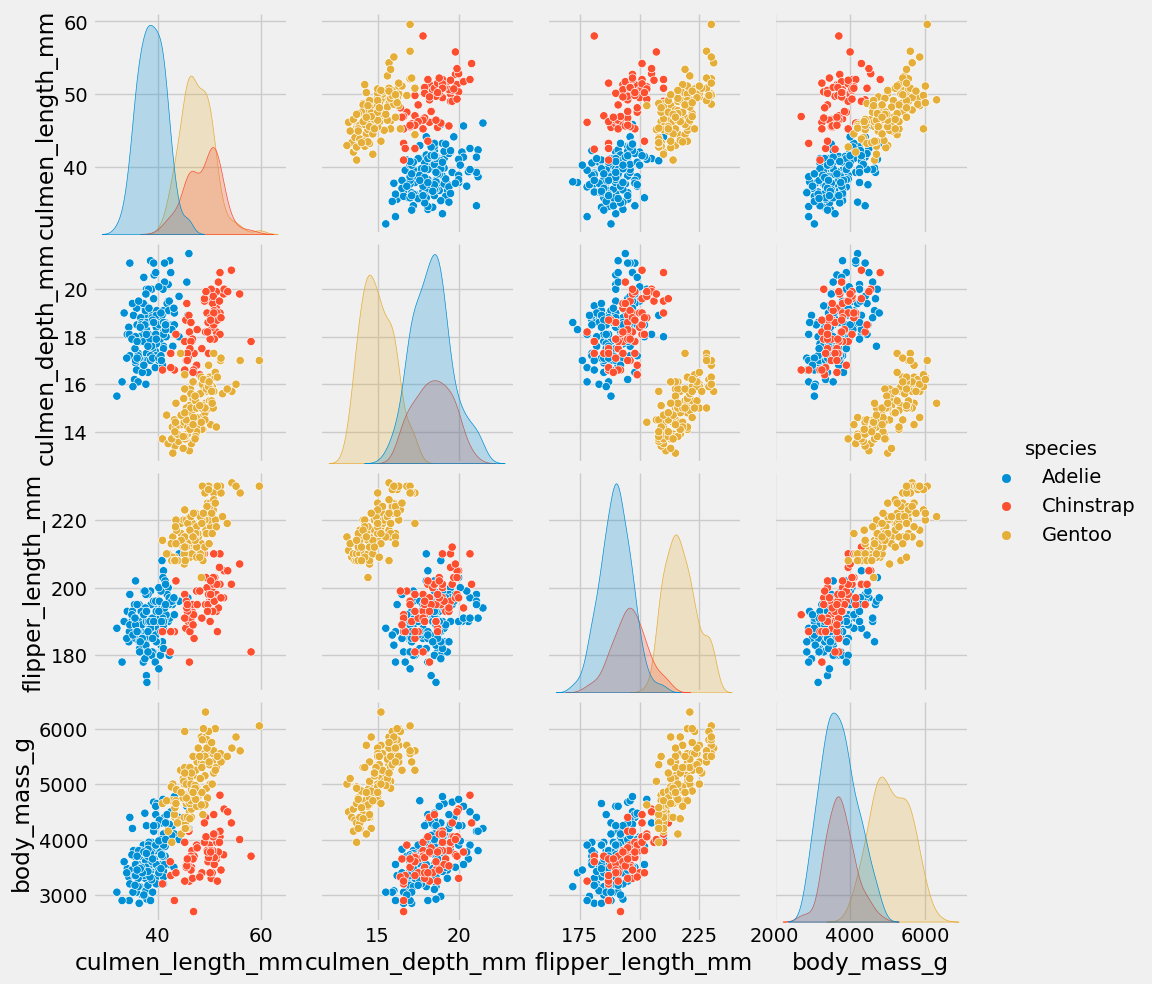

In [24]:
#input your code here
sns.pairplot(data, hue='species')

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas? 

Dari pairplot yang ditampilkan, terdapat beberapa kesimpulan yang dapat diambil mengenai hubungan antar variabel pada data pinguin:

1. Terdapat perbedaan ukuran tubuh yang cukup signifikan antara jenis pinguin Adelie dengan jenis pinguin Gentoo dan Chinstrap.
2. Terdapat korelasi yang cukup kuat antara culmen_length_mm dan flipper_length_mm, yang menunjukkan semakin panjang culmen (paruh) seekor pinguin, maka cenderung semakin panjang juga flipper (sirip) pinguin tersebut.
3. Terdapat beberapa outlier pada beberapa variabel, seperti body_mass_g dan bill_depth_mm pada jenis pinguin Gentoo.
4. Terdapat beberapa distribusi variabel yang miring, seperti body_mass_g dan culmen_length_mm, yang menunjukkan adanya perbedaan ukuran tubuh yang cukup signifikan pada jenis pinguin tertentu.
5. Terdapat juga beberapa hubungan antara pasangan variabel yang tidak terlalu signifikan, seperti body_mass_g dan culmen_depth_mm, flipper_length_mm dan body_mass_g, atau culmen_length_mm dan body_mass_g.